In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly as py

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
import cufflinks as cf
cf.go_offline()
import os

from sklearn.model_selection import train_test_split
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV)
from sklearn.metrics import (mean_squared_error, mean_absolute_error)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor

# Regressors considered:
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,LogisticRegression # only model used for final submission
print('Libray Loaded')

Libray Loaded


In [2]:
train = pd.read_csv('train 2.csv')
test = pd.read_csv('test.csv')
train.shape,test.shape

((137, 43), (100000, 42))

In [3]:
X = pd.concat([train,test])
X.shape

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




(100137, 43)

In [4]:
X.head()

City  City Group  Id   Open Date  P1  P10  P11  P12  P13  P14  ...  \
0    İstanbul  Big Cities   0  07/17/1999   4    5    3    5  5.0    1  ...   
1      Ankara  Big Cities   1  02/14/2008   4    5    1    5  5.0    0  ...   
2  Diyarbakır       Other   2  03/09/2013   2    5    2    5  5.0    0  ...   
3       Tokat       Other   3  02/02/2012   6   10    8   10  7.5    6  ...   
4   Gaziantep       Other   4  05/09/2009   3    5    2    5  5.0    2  ...   

   P36  P37   P4  P5  P6  P7  P8  P9  Type    revenue  
0    3    4  4.0   2   2   5   4   5    IL  5653753.0  
1    0    0  4.0   1   2   5   5   5    FC  6923131.0  
2    0    0  5.0   2   3   5   5   5    IL  2055379.0  
3   12    6  6.0   4   4  10   8  10    IL  2675511.0  
4    3    3  4.0   2   2   5   5   5    IL  4316715.0  

[5 rows x 43 columns]

In [5]:
train.isnull().sum(),test.isnull().sum()

(Id            0
 Open Date     0
 City          0
 City Group    0
 Type          0
 P1            0
 P2            0
 P3            0
 P4            0
 P5            0
 P6            0
 P7            0
 P8            0
 P9            0
 P10           0
 P11           0
 P12           0
 P13           0
 P14           0
 P15           0
 P16           0
 P17           0
 P18           0
 P19           0
 P20           0
 P21           0
 P22           0
 P23           0
 P24           0
 P25           0
 P26           0
 P27           0
 P28           0
 P29           0
 P30           0
 P31           0
 P32           0
 P33           0
 P34           0
 P35           0
 P36           0
 P37           0
 revenue       0
 dtype: int64, Id            0
 Open Date     0
 City          0
 City Group    0
 Type          0
 P1            0
 P2            0
 P3            0
 P4            0
 P5            0
 P6            0
 P7            0
 P8            0
 P9            0
 P10           0


In [13]:
X.duplicated().sum()

0

In [19]:
print("**************** Identifying categorical and numerical variables *****************")
print(train.columns)
print(train.dtypes)

**************** Identifying categorical and numerical variables *****************
Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')
Id              int64
Open Date      object
City           object
City Group     object
Type           object
P1              int64
P2            float64
P3            float64
P4            float64
P5              int64
P6              int64
P7              int64
P8              int64
P9              int64
P10             int64
P11             int64
P12             int64
P13           float64
P14             int64
P15             int64
P16             int64
P17             int64
P18             int64
P19             int64
P20             int64

In [3]:
cat_feature = [col for col in train.columns if train[col].dtypes == "O"]
cat_feature

['Open Date', 'City', 'City Group', 'Type']

In [4]:
num_feature = [col for col in train.columns if train[col].dtypes != "O"]
num_feature

['Id',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'P10',
 'P11',
 'P12',
 'P13',
 'P14',
 'P15',
 'P16',
 'P17',
 'P18',
 'P19',
 'P20',
 'P21',
 'P22',
 'P23',
 'P24',
 'P25',
 'P26',
 'P27',
 'P28',
 'P29',
 'P30',
 'P31',
 'P32',
 'P33',
 'P34',
 'P35',
 'P36',
 'P37',
 'revenue']

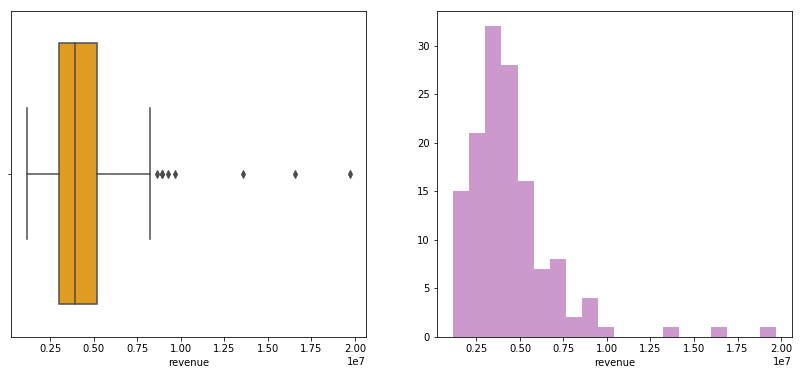

In [26]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(train.revenue,color='orange')
plt.subplot(1,2,2)
sns.distplot(train.revenue, bins=20, kde=False,color='purple')
plt.show()

In [5]:
rev_stat=train.revenue.describe()
print(rev_stat)
# calculating interquartile range
iqr=rev_stat['75%']-rev_stat['25%']
upper=rev_stat['75%']+1.5*iqr
lower=rev_stat['25%']-1.5*iqr
print()
print('The upper and lower bounds for suspected outliers are {} and {}'.format(lower,upper))

count    1.370000e+02
mean     4.453533e+06
std      2.576072e+06
min      1.149870e+06
25%      2.999068e+06
50%      3.939804e+06
75%      5.166635e+06
max      1.969694e+07
Name: revenue, dtype: float64

The upper and lower bounds for suspected outliers are -252282.5 and 8417985.5


In [29]:
train[train.revenue>upper]

Id   Open Date      City  City Group Type  P1   P2   P3   P4  P5  ...  \
16    16  01/07/2000  İstanbul  Big Cities   FC   3  5.0  4.0  4.0   2  ...   
24    24  09/20/2009  İstanbul  Big Cities   IL   5  5.0  3.0  5.0   2  ...   
49    49  04/01/2008  İstanbul  Big Cities   FC  12  7.5  6.0  6.0   2  ...   
75    75  10/15/2005  İstanbul  Big Cities   FC   5  5.0  4.0  5.0   1  ...   
99    99  12/18/1999  İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
100  100  09/21/2007  İstanbul  Big Cities   FC   3  5.0  4.0  4.0   2  ...   
116  116  03/30/2012     İzmir  Big Cities   FC   2  4.0  4.0  4.0   2  ...   
133  133  10/12/2006     İzmir  Big Cities   FC   4  5.0  4.0  4.0   2  ...   

     P29  P30  P31  P32  P33  P34  P35  P36  P37     revenue  
16   2.0    0    0    0    0    0    0    0    0  19696939.0  
24   2.0    5    5    4    4    4    4    5    2   8904084.0  
49   7.5    0    0    0    0    0    0    0    0   8630682.0  
75   0.0    0    0    0    0    0    0    0    0  16549064.0  
99   1.0    5    5    4    2    5    5    5    3  13575224.0  
100  3.0    0    0    0    0    0    0    0    0   9652350.0  
116  3.0    0    0    0    0    0    0    0    0   8894598.0  
133  3.0    0    0    0    0    0    0    0    0   9262754.0  

[8 rows x 43 columns]

In [6]:
train_date=train['Open Date'].str.split('/', n = 2, expand = True)
train['month']=train_date[0]
train['days']=train_date[1]
train['year']=train_date[2]

test_date=test['Open Date'].str.split('/', n = 2, expand = True)
test['month']=test_date[0]
test['days']=test_date[1]
test['year']=test_date[2]
train['month'].head(5)

0    07
1    02
2    03
3    02
4    05
Name: month, dtype: object

In [41]:


def featureCatPlot(col):
    plt.figure(figsize=(20,5))
    i=1
    if not train[col].dtype.name=='int64' and not train[col].dtype.name=='float64':
        plt.subplot(1,2,i)
        sns.boxplot(x=col,y='revenue',data=train)
        plt.xticks(rotation=60)
        plt.ylabel('Revenue')
        i+=1 
        plt.subplot(1,2,i)
        mean=train.groupby(col)['revenue'].mean()
        level=mean.sort_values().index.tolist()
        train[col]=train[col].astype('category')
        train[col].cat.reorder_categories(level,inplace=True)
        train[col].value_counts().plot()
        plt.xticks(rotation=60)
        plt.xlabel(col)
        plt.ylabel('Counts')       
        plt.show()



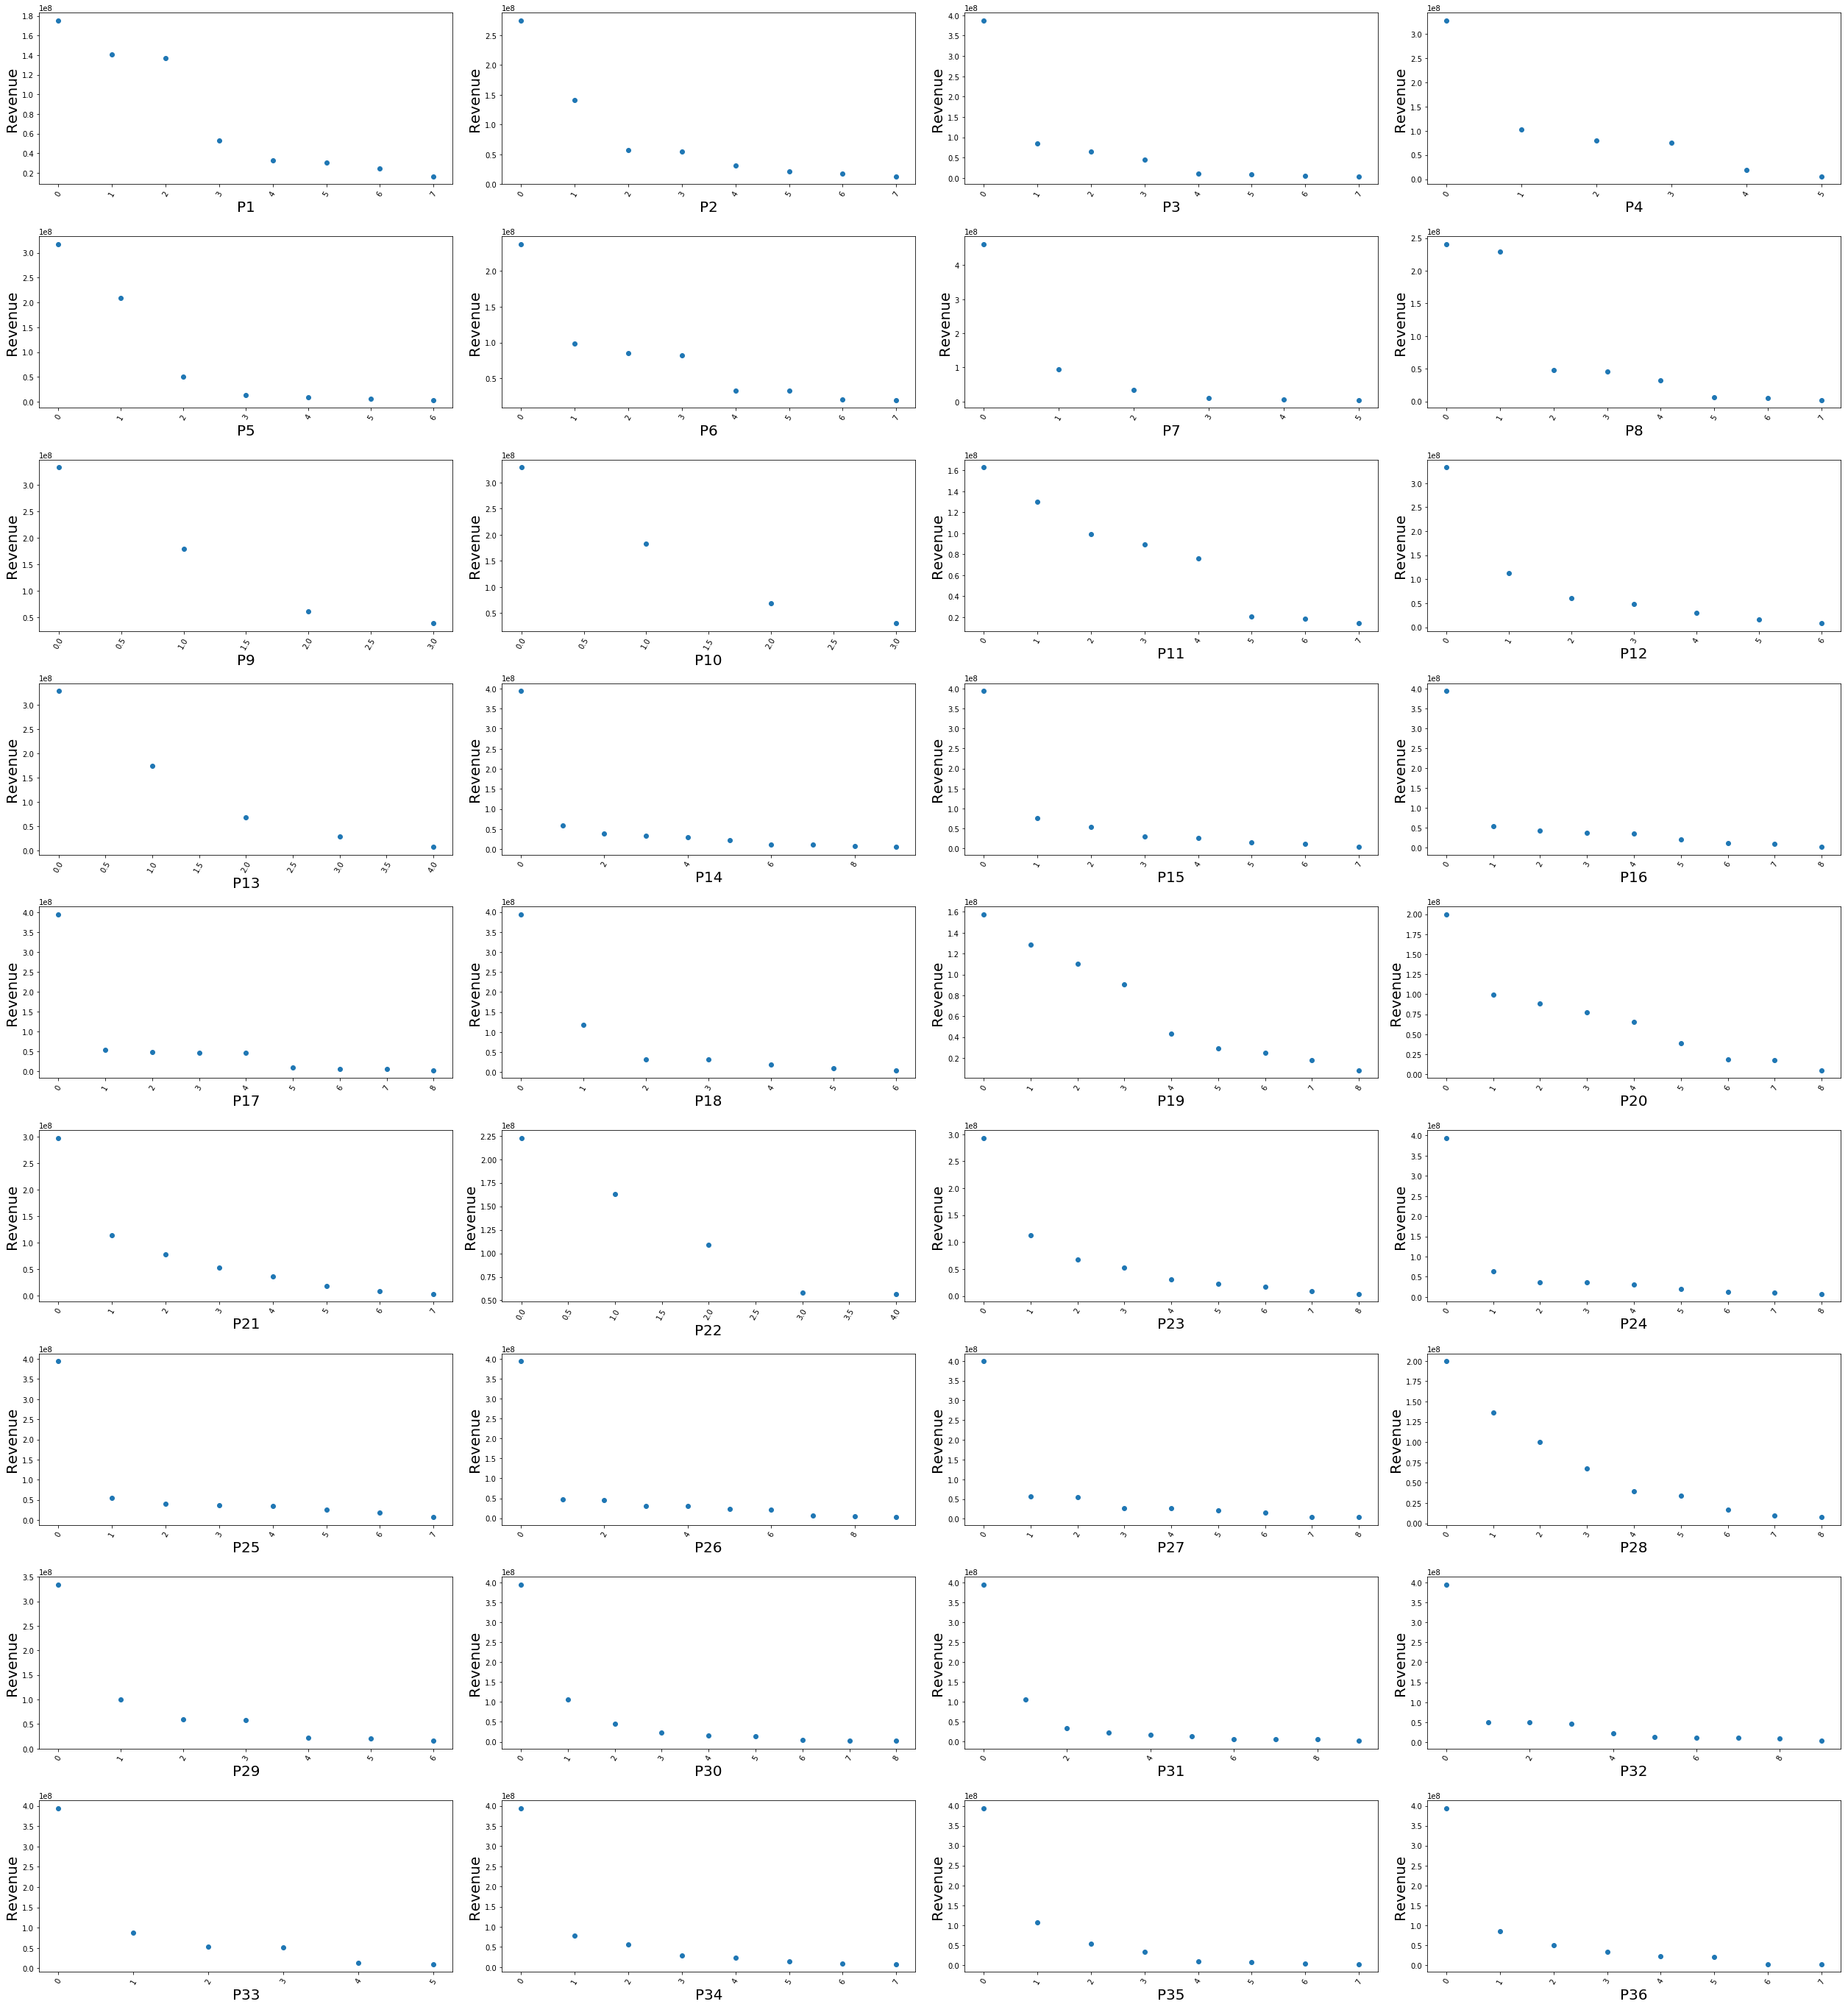

In [36]:


#  plot correlation between revenue and continuous feature
def numFeaturePlot():
    features=(train.loc[:,'P1':'P37']).columns.tolist()
    plt.figure(figsize=(35,38))
    j=1
    while j<len(features):
        col=features[j-1]
        plt.subplot(9,4,j)
        sorted_grp = train.groupby(col)["revenue"].sum().sort_values(ascending=False).reset_index()
        x_val = sorted_grp.index
        y_val = sorted_grp['revenue'].values
        plt.scatter(x_val, y_val)
        plt.xticks(rotation=60)
        plt.xlabel(col, fontsize=20)
        plt.ylabel('Revenue', fontsize=20)
        j+=1    
    plt.tight_layout()
    plt.show()

numFeaturePlot()

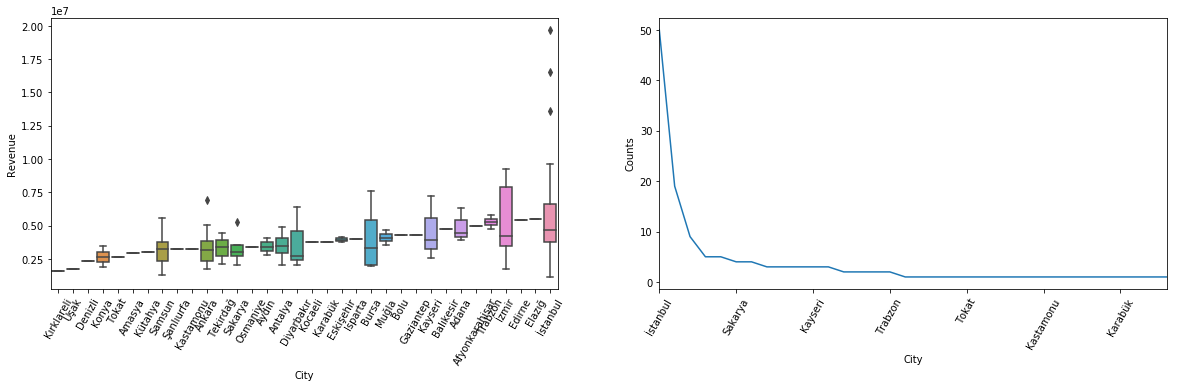

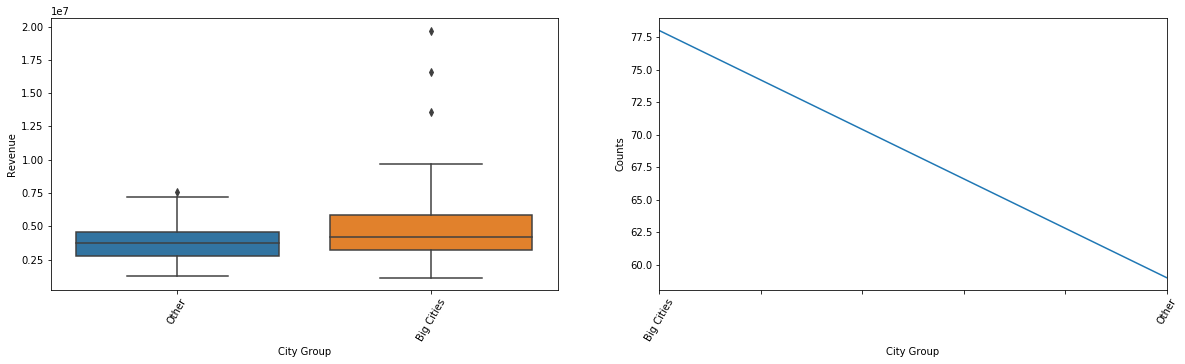

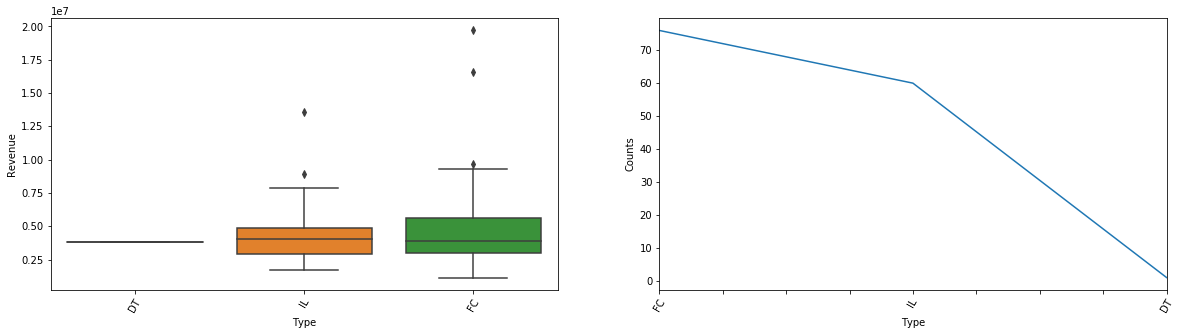

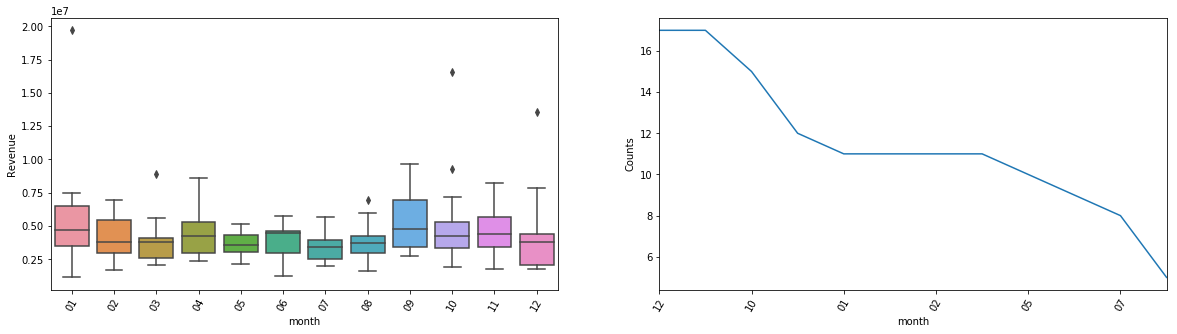

In [44]:
for feat in cat_feature:
    if feat != 'Open Date':
        featureCatPlot(feat)

featureCatPlot('month')

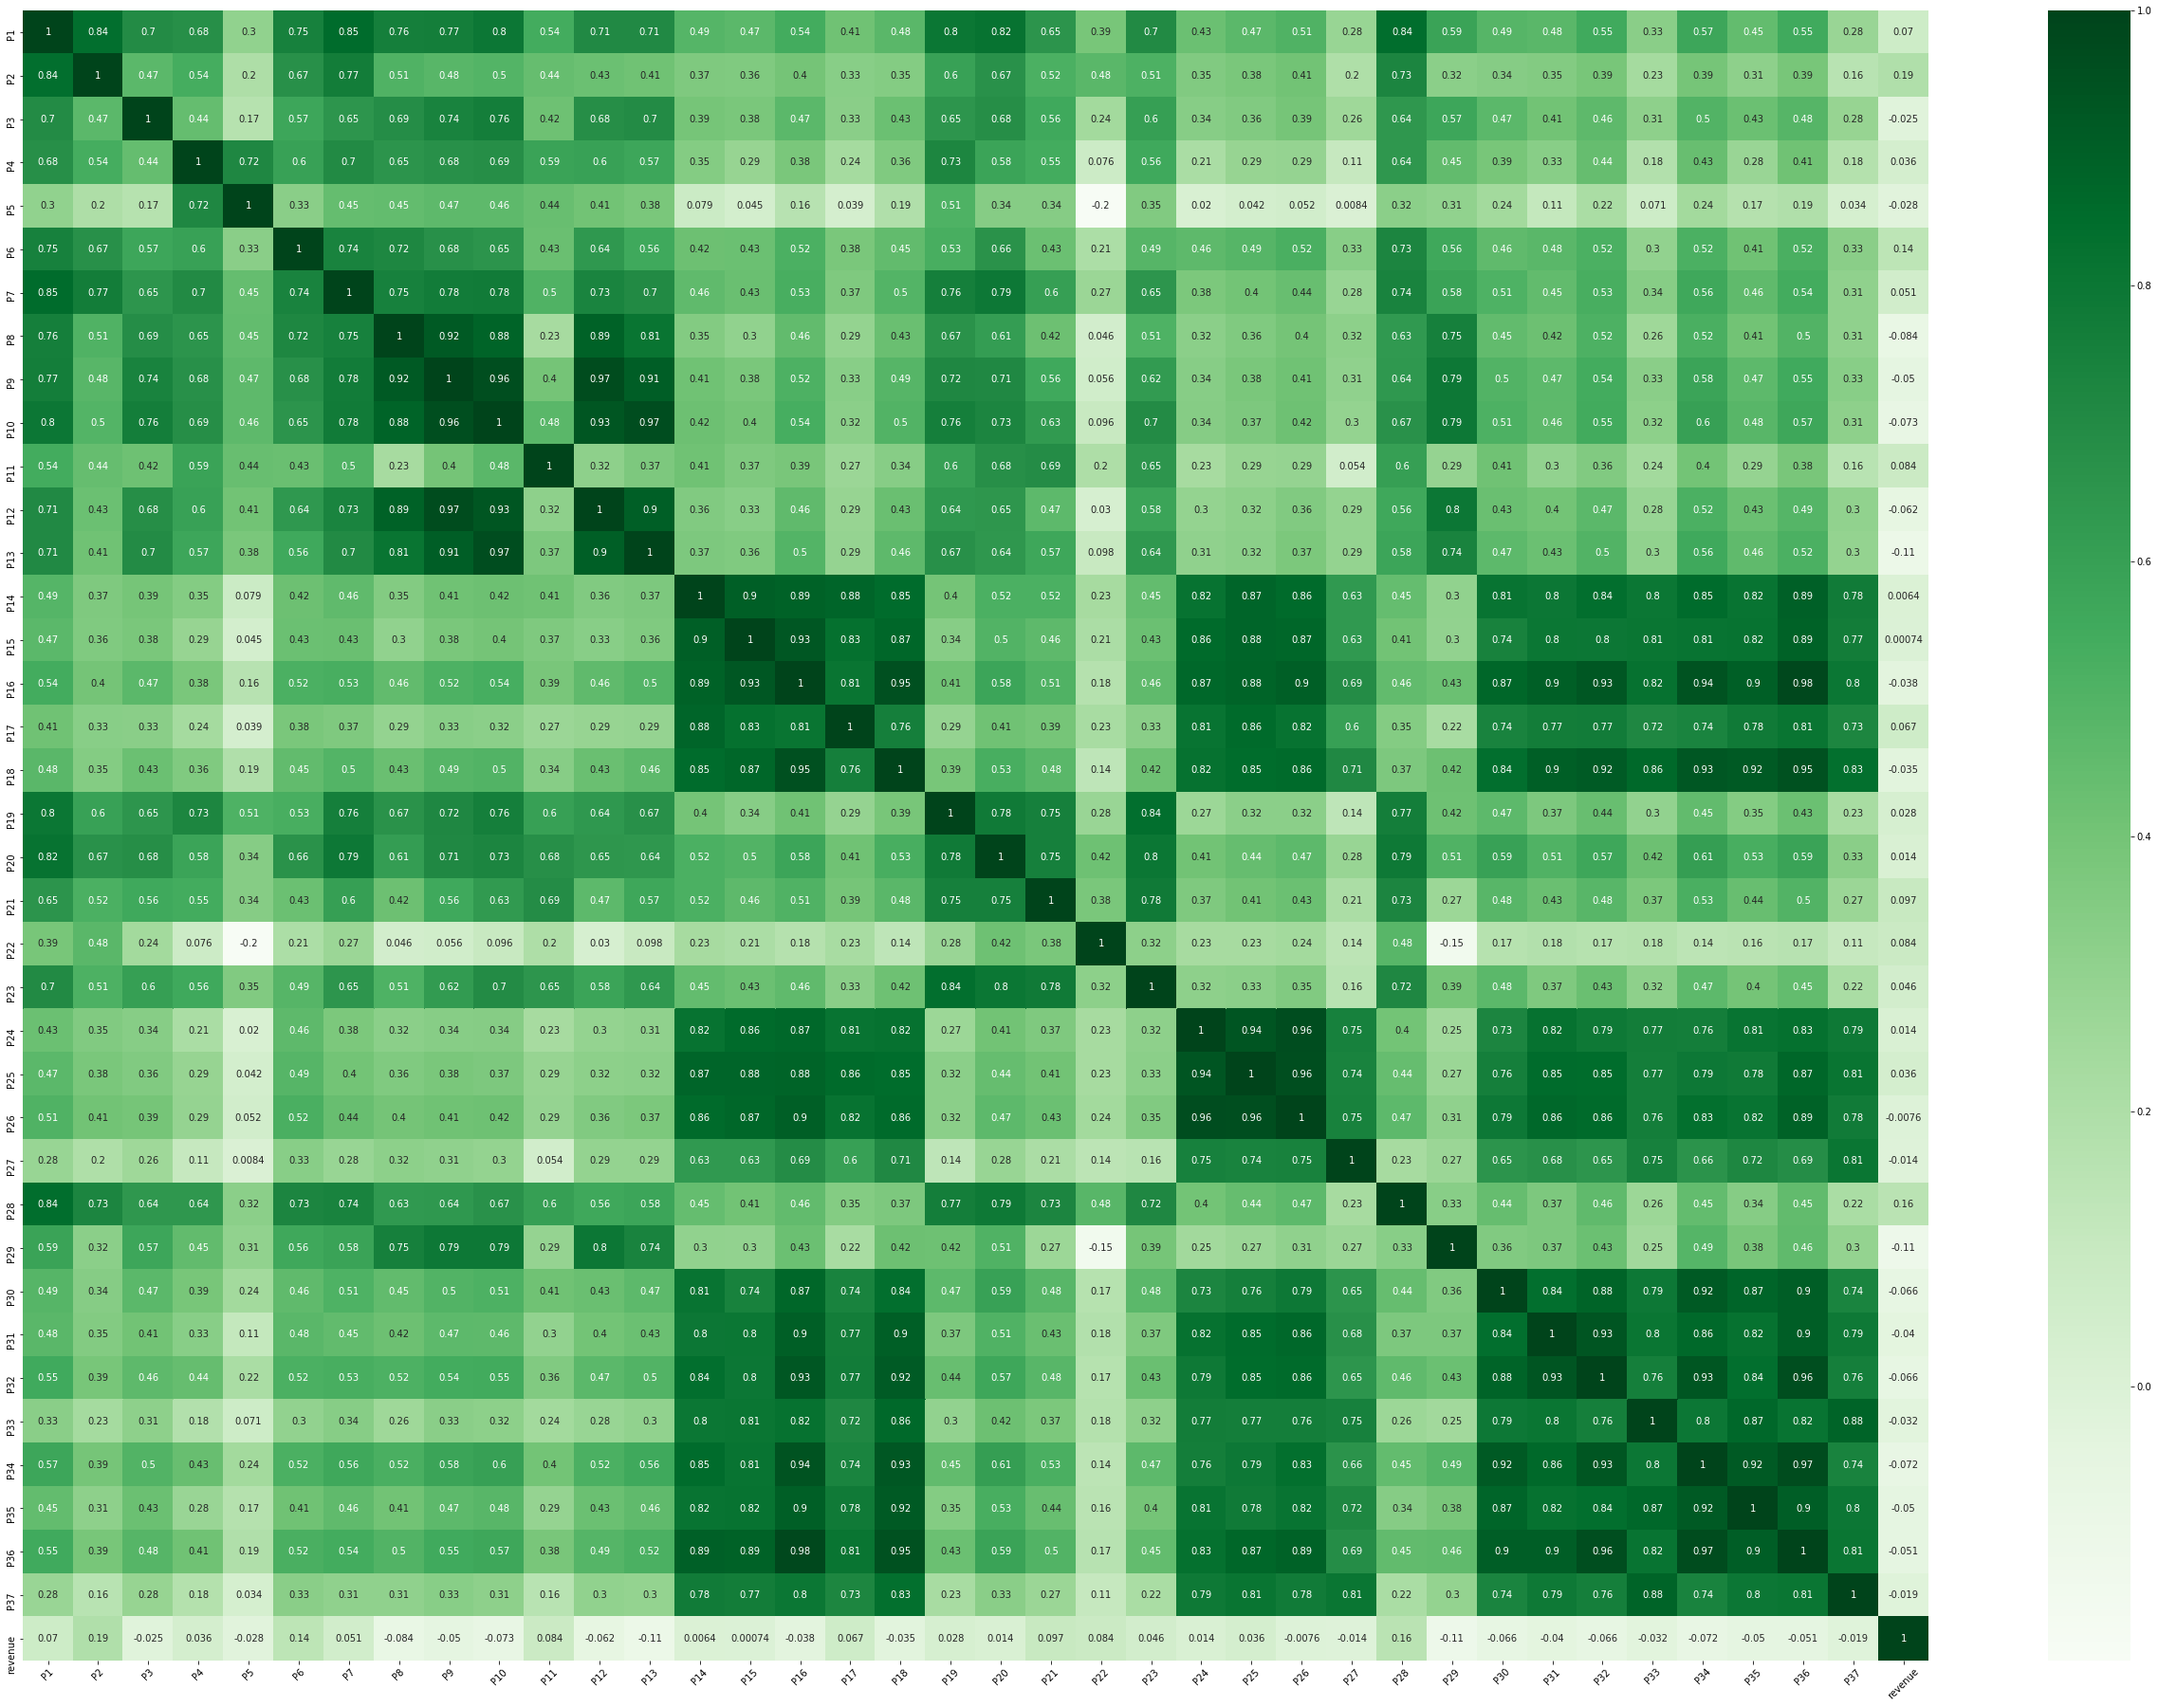

In [46]:
# Plotting heatmap between revenue and P variables
fig=plt.figure(figsize=(45,32))
features=(train.loc[:,'P1':'P37']).columns.tolist()
sns.heatmap(train[features+['revenue']].corr(),cmap='Greens',annot=True)
plt.xticks(rotation=45)
plt.show()



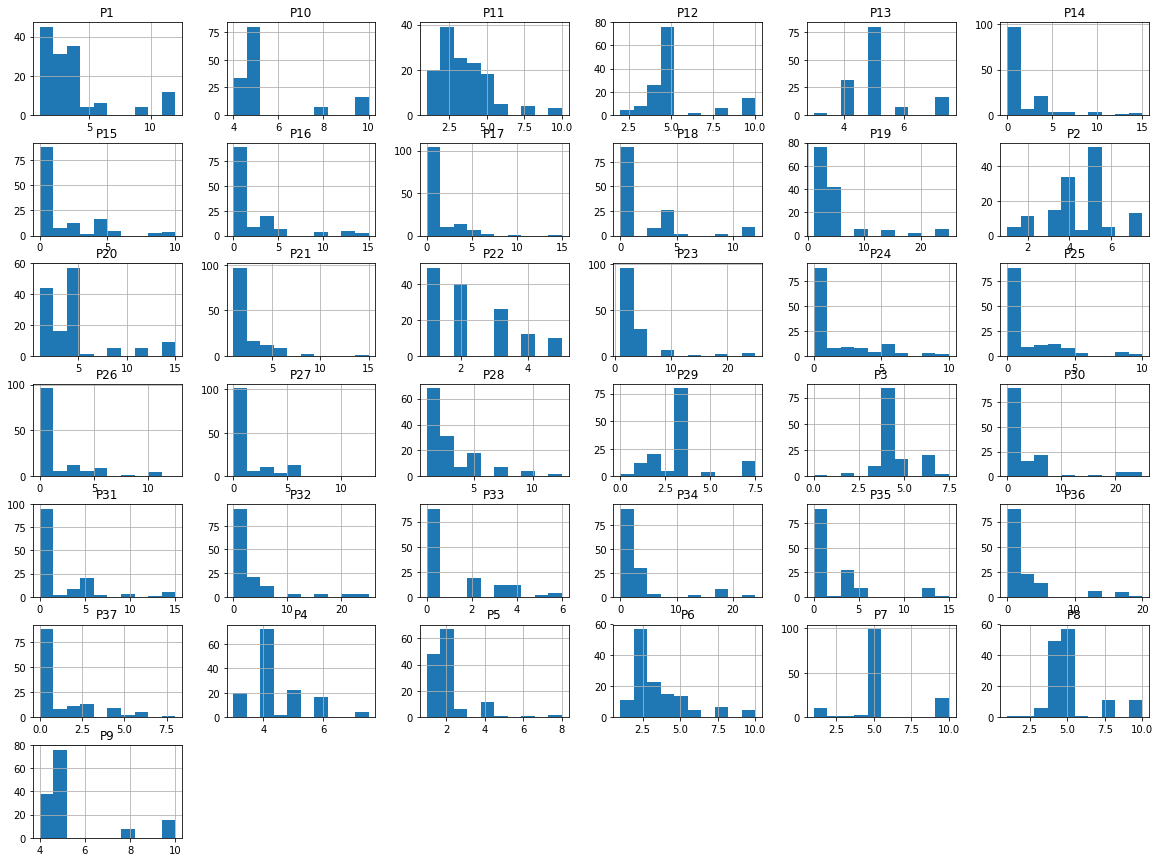

In [48]:
features=(train.loc[:,'P1':'P37']).columns.tolist()
train[features].hist(figsize=(20,15))
plt.show()

# Feature Engineering

In [7]:
import numpy as np
# Square root of the P variables
ntrain= np.sqrt(train.loc[:,'P1':'P37'])
ntest= np.sqrt(test.loc[:,'P1':'P37'])

col_train = ntrain.columns
col_test = ntest.columns
ntrain.head()

P1        P2        P3        P4        P5        P6        P7  \
0  2.000000  2.236068  2.000000  2.000000  1.414214  1.414214  2.236068   
1  2.000000  2.236068  2.000000  2.000000  1.000000  1.414214  2.236068   
2  1.414214  2.000000  1.414214  2.236068  1.414214  1.732051  2.236068   
3  2.449490  2.121320  2.449490  2.449490  2.000000  2.000000  3.162278   
4  1.732051  2.000000  1.732051  2.000000  1.414214  1.414214  2.236068   

         P8        P9       P10  ...       P28       P29       P30       P31  \
0  2.000000  2.236068  2.236068  ...  1.414214  1.732051  2.236068  1.732051   
1  2.236068  2.236068  2.236068  ...  1.732051  1.732051  0.000000  0.000000   
2  2.236068  2.236068  2.236068  ...  1.000000  1.732051  0.000000  0.000000   
3  2.828427  3.162278  3.162278  ...  1.581139  2.738613  5.000000  3.464102   
4  2.236068  2.236068  2.236068  ...  1.000000  1.732051  2.236068  1.000000   

        P32       P33       P34       P35       P36       P37  
0  2.000000  2.236068  2.236068  2.000000  1.732051  2.000000  
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3  3.162278  2.449490  4.242641  3.464102  3.464102  2.449490  
4  1.732051  1.414214  1.732051  2.000000  1.732051  1.732051  

[5 rows x 37 columns]

In [8]:


from sklearn.preprocessing import StandardScaler
SS =StandardScaler()

ntrain = SS.fit_transform(ntrain)
ntest = SS.fit_transform(ntest)

ntrain= pd.DataFrame(ntrain,columns=col_train)
ntest= pd.DataFrame(ntest,columns=col_test)

ntrain.head()

P1        P2        P3        P4        P5        P6        P7  \
0  0.154045  0.446850 -0.201271 -0.333476  0.124617 -0.654496 -0.067010   
1  0.154045  0.446850 -0.201271 -0.333476 -1.005005 -0.654496 -0.067010   
2 -0.783627 -0.166776 -2.238525  0.677030  0.124617 -0.046356 -0.067010   
3  0.873546  0.148580  1.361969  1.590598  1.722145  0.466330  1.724665   
4 -0.274863 -0.166776 -1.133147 -0.333476  0.124617 -0.654496 -0.067010   

         P8        P9       P10  ...       P28       P29       P30       P31  \
0 -0.626121 -0.199544 -0.225338  ... -0.517620  0.050993  0.959953  0.823025   
1 -0.005152 -0.199544 -0.225338  ...  0.048149  0.050993 -0.666273 -0.680541   
2 -0.005152 -0.199544 -0.225338  ... -1.254944  0.050993 -0.666273 -0.680541   
3  1.553030  2.421213  2.388412  ... -0.220484  2.213252  2.970080  2.326591   
4 -0.005152 -0.199544 -0.225338  ... -1.254944  0.050993  0.959953  0.187543   

        P32       P33       P34       P35       P36       P37  
0  0.848783  1.863596  1.039680  1.013553  0.728835  1.610808  
1 -0.657091 -0.726484 -0.653264 -0.701287 -0.678804 -0.707522  
2 -0.657091 -0.726484 -0.653264 -0.701287 -0.678804 -0.707522  
3  1.723905  2.110807  2.558871  2.268904  2.136474  2.131841  
4  0.647034  0.911627  0.658085  1.013553  0.728835  1.300210  

[5 rows x 37 columns]

In [9]:


train = train[train.columns[train.columns.isin(['Id','City','City Group','Type','month','days','year','revenue'])]]
train = pd.concat([train,ntrain],axis=1)
test = test[test.columns[test.columns.isin(['Id','City','City Group','Type','month','days','year'])]]
test = pd.concat([test,ntest],axis=1)
train.head(5)



Id        City  City Group Type    revenue month days  year        P1  \
0   0    İstanbul  Big Cities   IL  5653753.0    07   17  1999  0.154045   
1   1      Ankara  Big Cities   FC  6923131.0    02   14  2008  0.154045   
2   2  Diyarbakır       Other   IL  2055379.0    03   09  2013 -0.783627   
3   3       Tokat       Other   IL  2675511.0    02   02  2012  0.873546   
4   4   Gaziantep       Other   IL  4316715.0    05   09  2009 -0.274863   

         P2  ...       P28       P29       P30       P31       P32       P33  \
0  0.446850  ... -0.517620  0.050993  0.959953  0.823025  0.848783  1.863596   
1  0.446850  ...  0.048149  0.050993 -0.666273 -0.680541 -0.657091 -0.726484   
2 -0.166776  ... -1.254944  0.050993 -0.666273 -0.680541 -0.657091 -0.726484   
3  0.148580  ... -0.220484  2.213252  2.970080  2.326591  1.723905  2.110807   
4 -0.166776  ... -1.254944  0.050993  0.959953  0.187543  0.647034  0.911627   

        P34       P35       P36       P37  
0  1.039680  1.013553  0.728835  1.610808  
1 -0.653264 -0.701287 -0.678804 -0.707522  
2 -0.653264 -0.701287 -0.678804 -0.707522  
3  2.558871  2.268904  2.136474  2.131841  
4  0.658085  1.013553  0.728835  1.300210  

[5 rows x 45 columns]

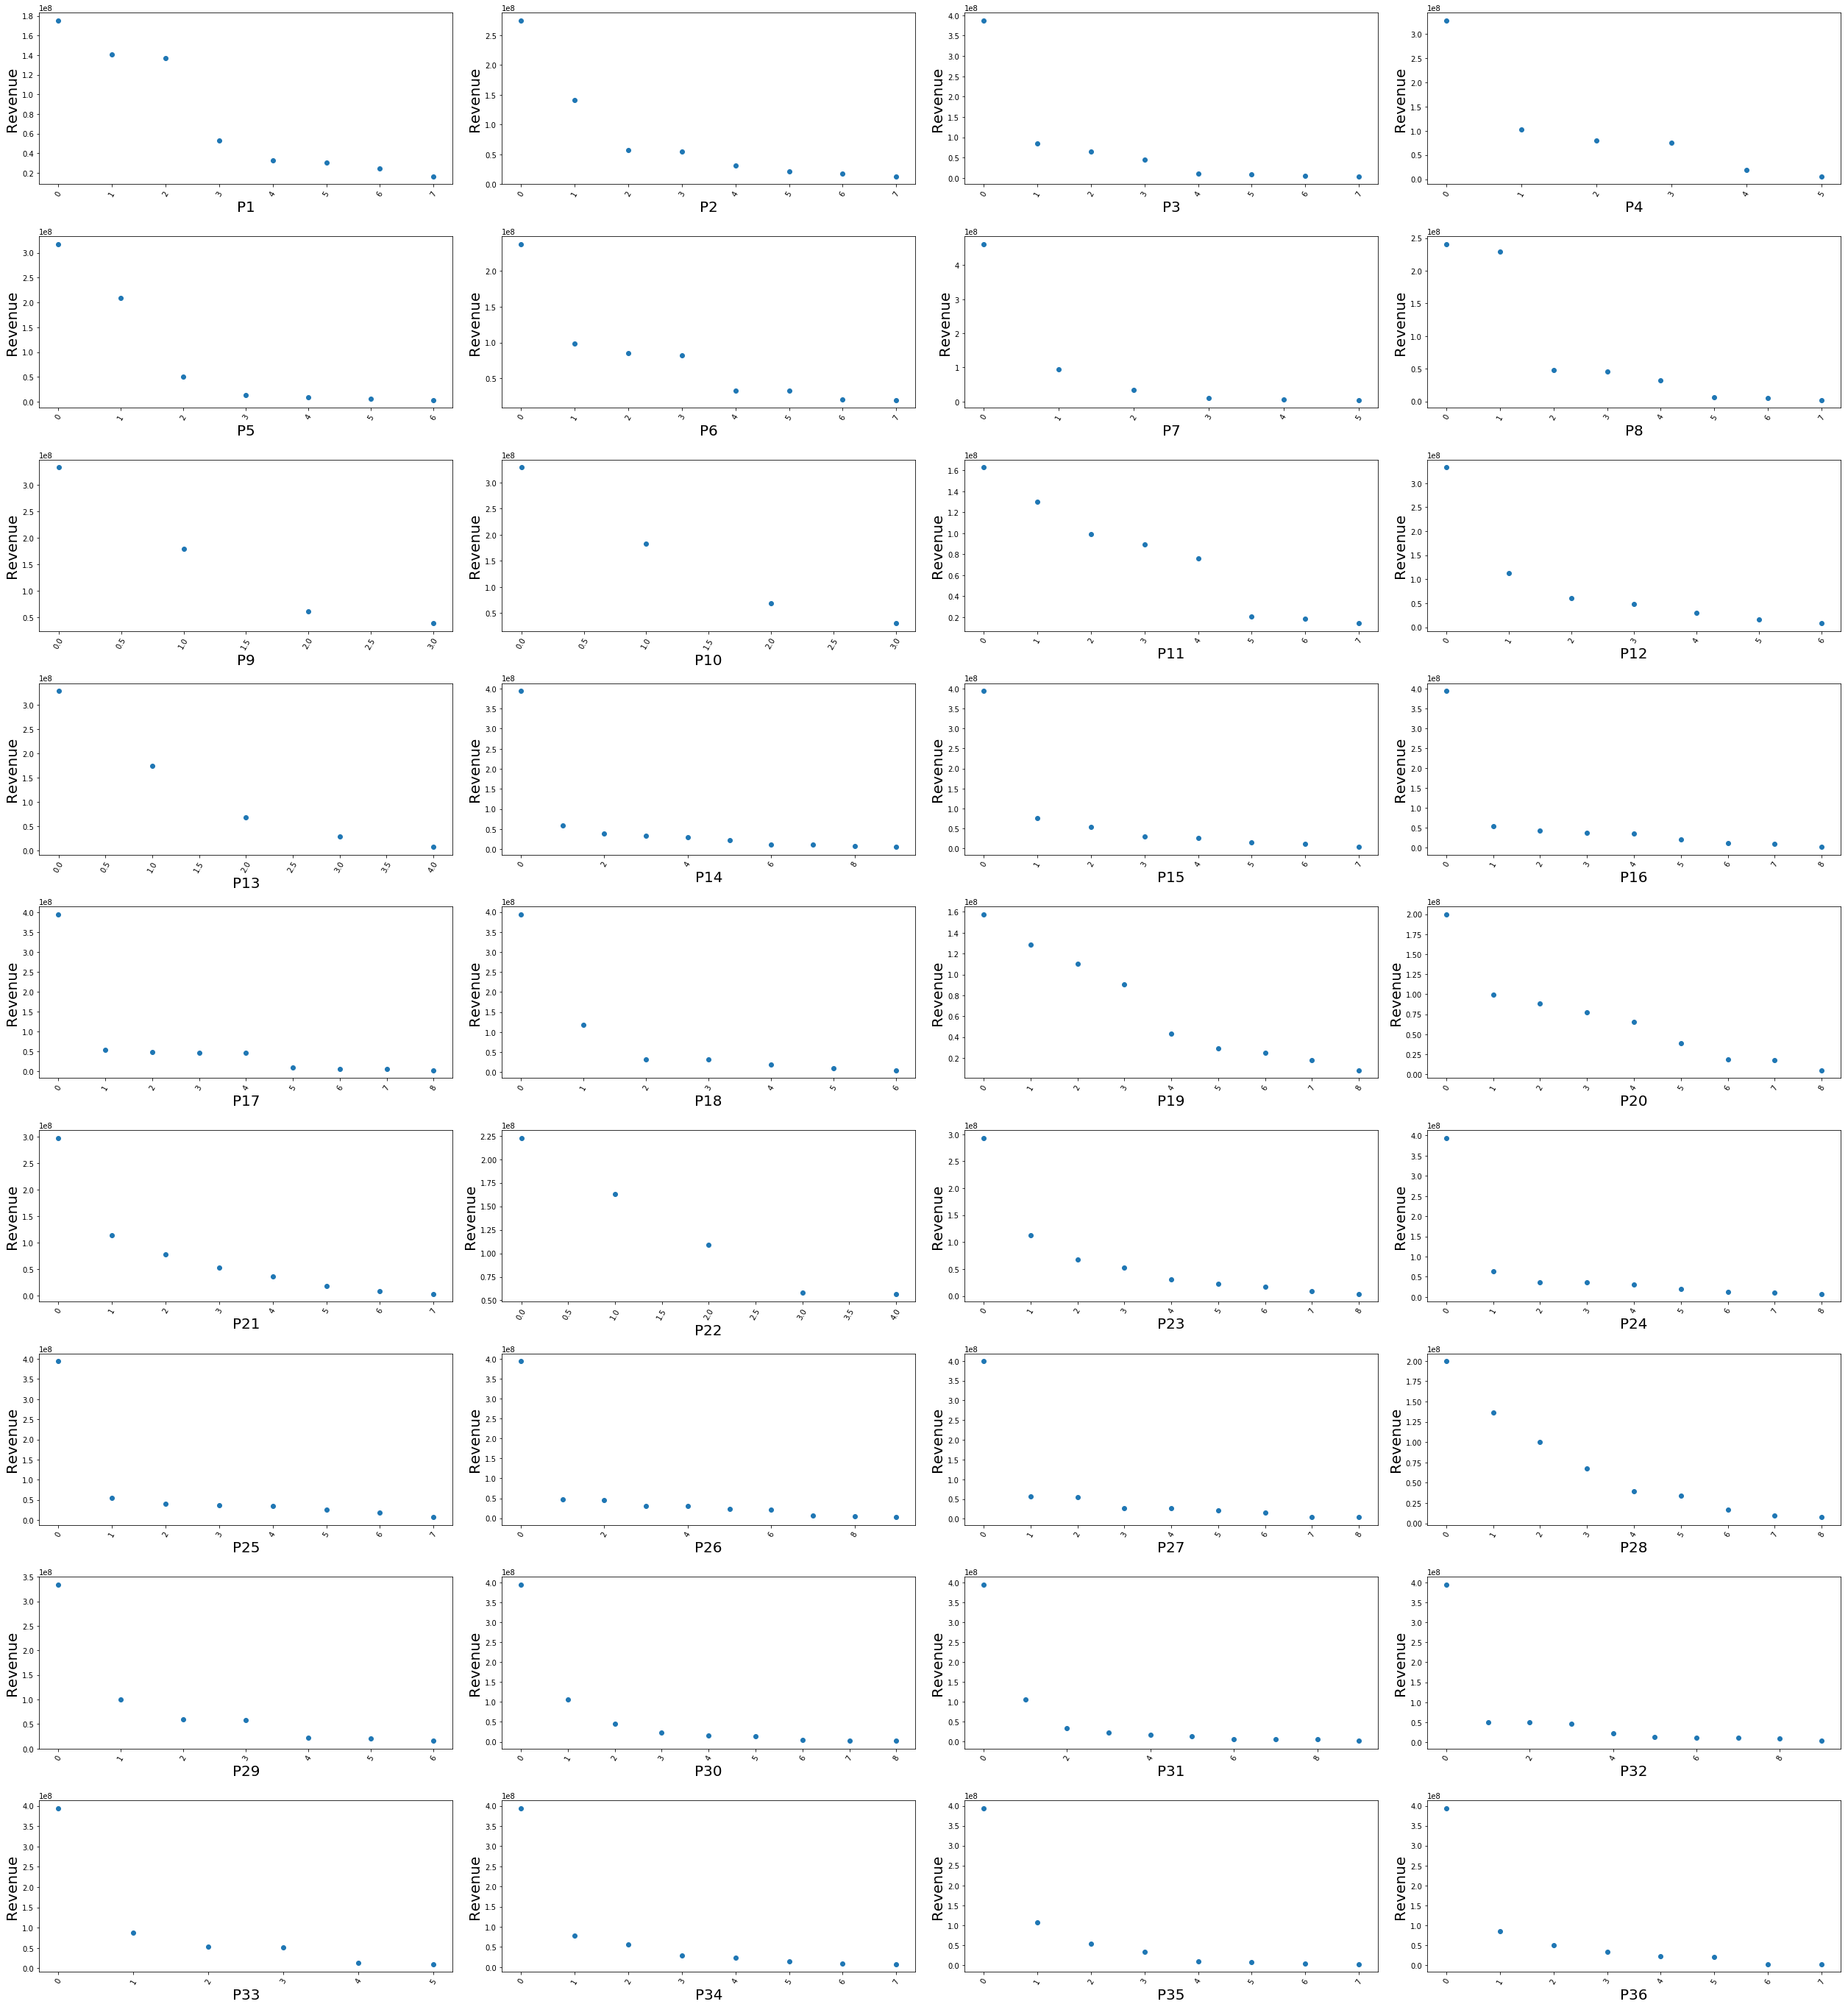

In [61]:
numFeaturePlot()



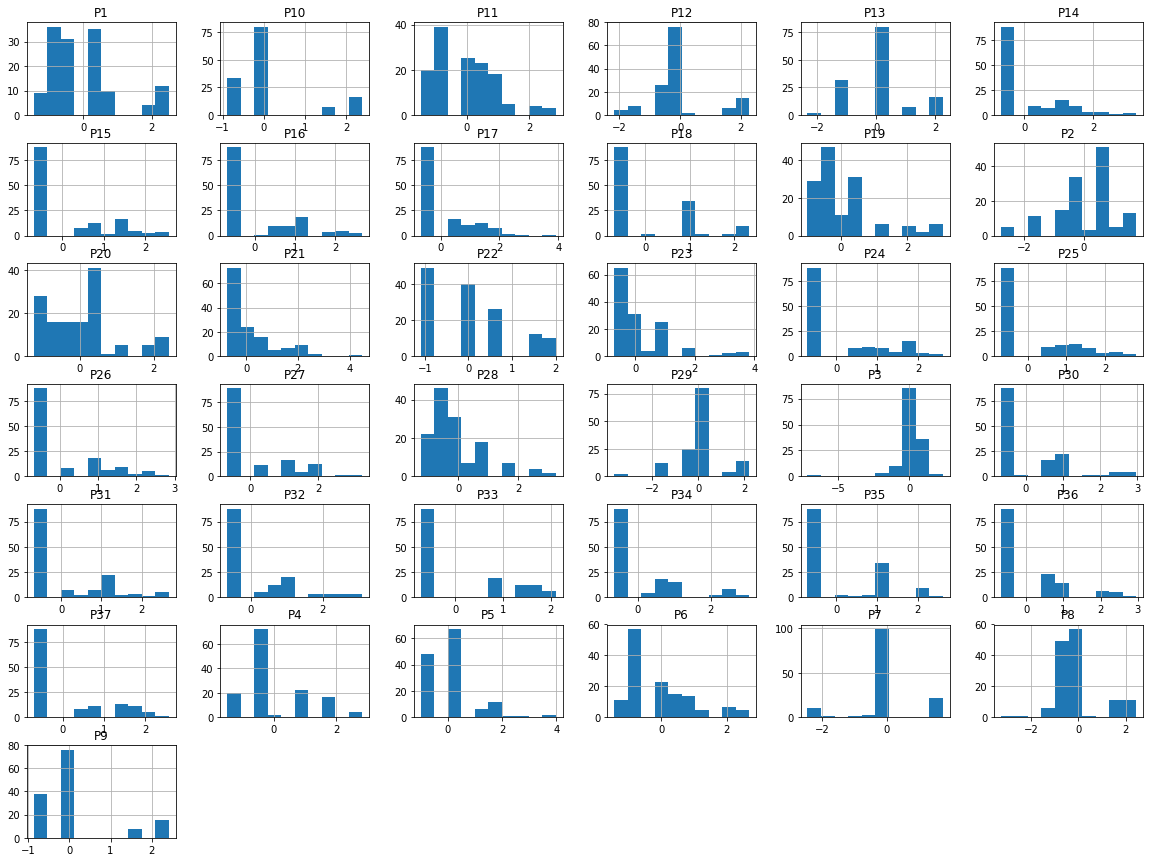

In [13]:
features=(train.loc[:,'P1':'P37']).columns.tolist()
train[features].hist(figsize=(20,15))
plt.show()

In [10]:
city = train.groupby('City')['revenue'].agg(['size','count','min','max','mean']).sort_values(by='mean',ascending = False)
city.columns = ['no. of rows','rows with revenue','min','max','average revenue']

x = city.index[:10]
city_x = [x * 1.0 for x, _ in enumerate(x)]
y_tr = city['no. of rows'][:10]
y_rr = city['rows with revenue'][:10]
y_min = city['min'][:10]
y_max = city['max'][:10]
y_avgr = city['average revenue'][:10]
city.head(10)



no. of rows  rows with revenue        min         max  \
City                                                                    
İstanbul                 50                 50  1149870.0  19696939.0   
Elazığ                    1                  1  5525735.0   5525735.0   
Edirne                    1                  1  5444227.0   5444227.0   
İzmir                     9                  9  1756069.0   9262754.0   
Trabzon                   2                  2  4780607.0   5787594.0   
Afyonkarahisar            1                  1  4952497.0   4952497.0   
Adana                     3                  3  3903884.0   6313221.0   
Balıkesir                 1                  1  4758476.0   4758476.0   
Kayseri                   3                  3  2544857.0   7201784.0   
Gaziantep                 1                  1  4316715.0   4316715.0   

                average revenue  
City                             
İstanbul           5.577812e+06  
Elazığ             5.525735e+06  
Edirne             5.444227e+06  
İzmir              5.287571e+06  
Trabzon            5.284100e+06  
Afyonkarahisar     4.952497e+06  
Adana              4.894944e+06  
Balıkesir          4.758476e+06  
Kayseri            4.567576e+06  
Gaziantep          4.316715e+06

# Model Training and Performance Evaluation

In [11]:


y_train = train['revenue']  #train target variable
x_train = train.drop(columns=['revenue'],axis=1)  #train features to be fit in model
x_test =test  #test features

x_train.head()

Id        City  City Group Type month days  year        P1        P2  \
0   0    İstanbul  Big Cities   IL    07   17  1999  0.154045  0.446850   
1   1      Ankara  Big Cities   FC    02   14  2008  0.154045  0.446850   
2   2  Diyarbakır       Other   IL    03   09  2013 -0.783627 -0.166776   
3   3       Tokat       Other   IL    02   02  2012  0.873546  0.148580   
4   4   Gaziantep       Other   IL    05   09  2009 -0.274863 -0.166776   

         P3  ...       P28       P29       P30       P31       P32       P33  \
0 -0.201271  ... -0.517620  0.050993  0.959953  0.823025  0.848783  1.863596   
1 -0.201271  ...  0.048149  0.050993 -0.666273 -0.680541 -0.657091 -0.726484   
2 -2.238525  ... -1.254944  0.050993 -0.666273 -0.680541 -0.657091 -0.726484   
3  1.361969  ... -0.220484  2.213252  2.970080  2.326591  1.723905  2.110807   
4 -1.133147  ... -1.254944  0.050993  0.959953  0.187543  0.647034  0.911627   

        P34       P35       P36       P37  
0  1.039680  1.013553  0.728835  1.610808  
1 -0.653264 -0.701287 -0.678804 -0.707522  
2 -0.653264 -0.701287 -0.678804 -0.707522  
3  2.558871  2.268904  2.136474  2.131841  
4  0.658085  1.013553  0.728835  1.300210  

[5 rows x 44 columns]

In [16]:
x_train.shape,x_test.shape,type(x_train)

((137, 44), (100000, 44), pandas.core.frame.DataFrame)

In [12]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

le =LabelEncoder()
for col in x_train.columns:
    if ((x_train[col].dtype.name == 'object') or (x_train[col].dtype.name == 'category')):
        x_train[col] = le.fit_transform(x_train[col])
        x_test[col] = le.fit_transform(x_test[col])

        
        

In [13]:
x_train.head()

Id  City  City Group  Type  month  days  year        P1        P2  \
0   0    31           0     2      6    16     3  0.154045  0.446850   
1   1     3           0     1      1    13    10  0.154045  0.446850   
2   2    10           1     2      2     8    15 -0.783627 -0.166776   
3   3    28           1     2      1     1    14  0.873546  0.148580   
4   4    14           1     2      4     8    11 -0.274863 -0.166776   

         P3  ...       P28       P29       P30       P31       P32       P33  \
0 -0.201271  ... -0.517620  0.050993  0.959953  0.823025  0.848783  1.863596   
1 -0.201271  ...  0.048149  0.050993 -0.666273 -0.680541 -0.657091 -0.726484   
2 -2.238525  ... -1.254944  0.050993 -0.666273 -0.680541 -0.657091 -0.726484   
3  1.361969  ... -0.220484  2.213252  2.970080  2.326591  1.723905  2.110807   
4 -1.133147  ... -1.254944  0.050993  0.959953  0.187543  0.647034  0.911627   

        P34       P35       P36       P37  
0  1.039680  1.013553  0.728835  1.610808  
1 -0.653264 -0.701287 -0.678804 -0.707522  
2 -0.653264 -0.701287 -0.678804 -0.707522  
3  2.558871  2.268904  2.136474  2.131841  
4  0.658085  1.013553  0.728835  1.300210  

[5 rows x 44 columns]

In [14]:
test_label=pd.read_csv('sampleSubmission.csv')  # test target
test_label.head(10)

Id  Prediction
0   0   4453532.6
1   1   4453532.6
2   2   4453532.6
3   3   4453532.6
4   4   4453532.6
5   5   4453532.6
6   6   4453532.6
7   7   4453532.6
8   8   4453532.6
9   9   4453532.6

In [17]:
# Functionalize model fittting
from math import sqrt
mse_list=dict()
gpred=[]

def FitModel(X,Y,algo_name,algorithm,gridSearchParams,cv):
    global gpred
    np.random.seed(10)
    x_train_L,x_test_L,y_train_L,y_test_L = train_test_split(X,Y, test_size = 0.05)
    
    
    grid = GridSearchCV(
        estimator=algorithm,
        param_grid=gridSearchParams,
        cv=cv,  verbose=1, n_jobs=-1)
    
    
    grid_result = grid.fit(x_train_L, y_train_L)
    best_params = grid_result.best_params_
    pred = grid_result.predict(x_test_L)
    
   # metrics =grid_result.gr
    #print(pred)
    #pickle.dump(grid_result,open(algo_name,'wb'))
    label_list=test_label['Prediction'].tolist()
    

    print('Best Params :',best_params)
    print('Root Mean squared error {}'.format(sqrt(mean_squared_error(y_test_L, pred))))
    
    pred_test = grid_result.predict(x_test)
    gpred= pred_test
    diff = label_list - pred_test
    res_df = pd.concat([pd.Series(pred_test),pd.Series(label_list),pd.Series(diff)],axis=1)
    res_df.columns = ['Prediction','Original Data','Diff']
    print()
    print('******************** MSE BASED on ORIGINAL TEST DATA **************************')
    print('Root Mean squared error {}'.format(sqrt(mean_squared_error(label_list, pred_test))))
    mse_list[algo_name]=sqrt(mean_squared_error(label_list, pred_test))
    print('******************** Prediction vs ORIGINAL TEST DATA **************************')
    print(res_df.head())

    
pd.options.display.float_format = '{:.2f}'.format

# Random Forest 

In [18]:
param ={
            'n_estimators': [50,100,150, 300,500, 700,1000, 2000],
           
        }
FitModel(x_train,y_train,'Random Forest',RandomForestRegressor(),param,cv=5)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   20.9s finished


Best Params : {'n_estimators': 300}
Root Mean squared error 4477881.00550696

******************** MSE BASED on ORIGINAL TEST DATA **************************
Root Mean squared error 1048062.1705819014
******************** Prediction vs ORIGINAL TEST DATA **************************
   Prediction  Original Data       Diff
0  4525727.24     4453532.60  -72194.64
1  3292520.63     4453532.60 1161011.97
2  3805965.39     4453532.60  647567.21
3  3239193.23     4453532.60 1214339.37
4  3875490.79     4453532.60  578041.81


# SVR

In [19]:
param ={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }
FitModel(x_train,y_train,'SVR',SVR(),param,cv=5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.2s finished


Best Params : {'C': 1000, 'gamma': 0.001}
Root Mean squared error 5250029.734702329

******************** MSE BASED on ORIGINAL TEST DATA **************************
Root Mean squared error 597154.016421862
******************** Prediction vs ORIGINAL TEST DATA **************************
   Prediction  Original Data      Diff
0  3859982.77     4453532.60 593549.83
1  3860221.98     4453532.60 593310.62
2  3857591.81     4453532.60 595940.79
3  3859567.42     4453532.60 593965.18
4  3857246.90     4453532.60 596285.70


# Logistic Regression

[]

In [18]:
logisticRegr = LogisticRegression()

# Applying Logistic Regression
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
label_list=test_label['Prediction'].tolist()
print('Root Mean squared error {}'.format(sqrt(mean_squared_error(label_list, predictions))))
mse_list['Logistic Regression'] = sqrt(mean_squared_error(label_list, predictions))
mse_list

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



Root Mean squared error 540154.2182071231


{'Logistic Regression': 540154.2182071231}

In [22]:
gpred = predictions

In [52]:


from sklearn.ensemble import GradientBoostingRegressor


param ={
            'max_depth':[2,3,4,5]
        }
FitModel(x_train,y_train,'GradientBoostingRegressor',GradientBoostingRegressor(),param,cv=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params : {'max_depth': 4}
Root Mean squared error 4553261.860126316


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished



******************** MSE BASED on ORIGINAL TEST DATA **************************
Root Mean squared error 1262935.3975110217
******************** Prediction vs ORIGINAL TEST DATA **************************
   Prediction  Original Data       Diff
0  3079345.79     4453532.60 1374186.81
1  2658139.93     4453532.60 1795392.67
2  3469791.41     4453532.60  983741.19
3  3562840.97     4453532.60  890691.63
4  3400155.40     4453532.60 1053377.20


In [29]:
import collections

mse_list=collections.OrderedDict(mse_list)
df =pd.DataFrame(list(mse_list.items()))
df.columns = ['Model','RMSE']

import plotly.express as px
fig = px.bar(df, x='Model', y='RMSE')
fig.show()



# Semi Supervised

In [26]:
pd.options.display.float_format = '{:.6f}'.format

In [27]:
gpred

array([4491607., 4491607., 1999097., ..., 3939804., 3939804., 3939804.])

In [28]:
x_test.shape,x_train.shape,y_train.shape,len(gpred),len(label_list)

((100000, 44), (137, 44), (137,), 100000, 100000)

In [29]:
x_train.head()

Id  City  City Group  Type  month  days  year        P1        P2  \
0   0    31           0     2      6    16     3  0.154045  0.446850   
1   1     3           0     1      1    13    10  0.154045  0.446850   
2   2    10           1     2      2     8    15 -0.783627 -0.166776   
3   3    28           1     2      1     1    14  0.873546  0.148580   
4   4    14           1     2      4     8    11 -0.274863 -0.166776   

         P3  ...       P28      P29       P30       P31       P32       P33  \
0 -0.201271  ... -0.517620 0.050993  0.959953  0.823025  0.848783  1.863596   
1 -0.201271  ...  0.048149 0.050993 -0.666273 -0.680541 -0.657091 -0.726484   
2 -2.238525  ... -1.254944 0.050993 -0.666273 -0.680541 -0.657091 -0.726484   
3  1.361969  ... -0.220484 2.213252  2.970080  2.326591  1.723905  2.110807   
4 -1.133147  ... -1.254944 0.050993  0.959953  0.187543  0.647034  0.911627   

        P34       P35       P36       P37  
0  1.039680  1.013553  0.728835  1.610808  
1 -0.653264 -0.701287 -0.678804 -0.707522  
2 -0.653264 -0.701287 -0.678804 -0.707522  
3  2.558871  2.268904  2.136474  2.131841  
4  0.658085  1.013553  0.728835  1.300210  

[5 rows x 44 columns]

In [30]:
X = pd.concat([x_train,x_test],axis=0)
X.shape

(100137, 44)

In [31]:
X

Id  City  City Group  Type  month  days  year        P1        P2  \
0          0    31           0     2      6    16     3  0.154045  0.446850   
1          1     3           0     1      1    13    10  0.154045  0.446850   
2          2    10           1     2      2     8    15 -0.783627 -0.166776   
3          3    28           1     2      1     1    14  0.873546  0.148580   
4          4    14           1     2      4     8    11 -0.274863 -0.166776   
...      ...   ...         ...   ...    ...   ...   ...       ...       ...   
99995  99995     4           1     1      0     4     5  0.509830  0.456501   
99996  99996    38           1     2      6    17    16 -1.561347 -1.861570   
99997  99997    54           0     2     11    28    17  0.114271  0.456501   
99998  99998    54           0     1      9    11    18  2.567545  1.873948   
99999  99999    54           0     2      9     4    15 -0.867283  0.456501   

             P3  ...       P28       P29       P30       P31       P32  \
0     -0.201271  ... -0.517620  0.050993  0.959953  0.823025  0.848783   
1     -0.201271  ...  0.048149  0.050993 -0.666273 -0.680541 -0.657091   
2     -2.238525  ... -1.254944  0.050993 -0.666273 -0.680541 -0.657091   
3      1.361969  ... -0.220484  2.213252  2.970080  2.326591  1.723905   
4     -1.133147  ... -1.254944  0.050993  0.959953  0.187543  0.647034   
...         ...  ...       ...       ...       ...       ...       ...   
99995 -0.178779  ... -0.572591  0.107356 -0.650834 -0.656410 -0.653116   
99996 -0.178779  ... -1.352940  0.107356  1.197587 -0.656410 -0.653116   
99997 -0.178779  ...  0.530991 -1.285333  1.197587  1.792120  0.831142   
99998  1.802696  ...  1.922486  1.066222 -0.650834 -0.656410 -0.653116   
99999 -0.178779  ...  0.975726  0.107356 -0.650834  0.892176 -0.653116   

            P33       P34       P35       P36       P37  
0      1.863596  1.039680  1.013553  0.728835  1.610808  
1     -0.726484 -0.653264 -0.701287 -0.678804 -0.707522  
2     -0.726484 -0.653264 -0.701287 -0.678804 -0.707522  
3      2.110807  2.558871  2.268904  2.136474  2.131841  
4      0.911627  0.658085  1.013553  0.728835  1.300210  
...         ...       ...       ...       ...       ...  
99995 -0.699753 -0.635476 -0.675864 -0.665409 -0.673723  
99996 -0.699753  0.996384 -0.675864 -0.665409 -0.673723  
99997  1.037266  0.996384  1.107203  1.046646  1.054559  
99998  1.756763 -0.635476 -0.675864 -0.665409 -0.673723  
99999  1.037266  0.518423  1.107203  0.545197 -0.673723  

[100137 rows x 44 columns]

In [32]:
Y = pd.concat([pd.Series(y_train),pd.Series(gpred)],axis=0)
Y.shape

(100137,)

In [33]:
Y

0       5653753.000000
1       6923131.000000
2       2055379.000000
3       2675511.000000
4       4316715.000000
             ...      
99995   3939804.000000
99996   3939804.000000
99997   3939804.000000
99998   3939804.000000
99999   3939804.000000
Length: 100137, dtype: float64

In [34]:
Y_hat =  pd.concat([pd.Series(y_train),pd.Series(label_list)],axis=0)
Y_hat.shape

(100137,)

In [35]:
X.head()

Id  City  City Group  Type  month  days  year        P1        P2  \
0   0    31           0     2      6    16     3  0.154045  0.446850   
1   1     3           0     1      1    13    10  0.154045  0.446850   
2   2    10           1     2      2     8    15 -0.783627 -0.166776   
3   3    28           1     2      1     1    14  0.873546  0.148580   
4   4    14           1     2      4     8    11 -0.274863 -0.166776   

         P3  ...       P28      P29       P30       P31       P32       P33  \
0 -0.201271  ... -0.517620 0.050993  0.959953  0.823025  0.848783  1.863596   
1 -0.201271  ...  0.048149 0.050993 -0.666273 -0.680541 -0.657091 -0.726484   
2 -2.238525  ... -1.254944 0.050993 -0.666273 -0.680541 -0.657091 -0.726484   
3  1.361969  ... -0.220484 2.213252  2.970080  2.326591  1.723905  2.110807   
4 -1.133147  ... -1.254944 0.050993  0.959953  0.187543  0.647034  0.911627   

        P34       P35       P36       P37  
0  1.039680  1.013553  0.728835  1.610808  
1 -0.653264 -0.701287 -0.678804 -0.707522  
2 -0.653264 -0.701287 -0.678804 -0.707522  
3  2.558871  2.268904  2.136474  2.131841  
4  0.658085  1.013553  0.728835  1.300210  

[5 rows x 44 columns]

In [27]:
100137-100137*0.20

80109.6

In [28]:
mse_list  

{'Random Forest': 1048062.1705819014,
 'SVR': 597154.016421862,
 'Logistic Regression': 540154.2182071231,
 'GradientBoostingRegressor': 1262935.3975110217}

In [37]:
mse_list_new=dict()


def FitModelSS(X,Y,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    x_train = X[0:80110]
    x_test = X[80110:]
    y_train = Y[0:80110]
    y_test= Y_hat[80110:]
    print(y_train)
    print("----")
    
    
    print(y_test)
    print("----")
    
    
    grid = GridSearchCV(
        estimator=algorithm,
        param_grid=gridSearchParams,
        cv=cv,  verbose=1, n_jobs=-1)
    
    
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(x_test)
    print(pred)
    #label_list=test_label['Prediction'].tolist()
    print("----")

    print('Best Params :',best_params)
    print('Root Mean squared error {}'.format(sqrt(mean_squared_error(y_test, pred))))
    
    diff = y_test - pred
    print(diff)
    res_df = pd.concat([pd.Series(pred),pd.Series(y_test),pd.Series(diff)],axis=1)
    res_df.columns = ['Prediction','Original Data','Diff']
    print()
    
    mse_list_new[algo_name]=sqrt(mean_squared_error(y_test, pred))
    print('******************** Prediction vs ORIGINAL TEST DATA **************************')
    print(res_df.head())

    
pd.options.display.float_format = '{:.2f}'.format

# SVR

In [64]:
param ={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }
FitModelSS(X,Y,'SVR',SVR(),param,cv=5)

0       5653753.00
1       6923131.00
2       2055379.00
3       2675511.00
4       4316715.00
           ...    
79968   4024286.99
79969   5570867.48
79970   2762757.70
79971   3458634.91
79972   2072696.87
Length: 80110, dtype: float64
----
79973   4453532.60
79974   4453532.60
79975   4453532.60
79976   4453532.60
79977   4453532.60
           ...    
99995   4453532.60
99996   4453532.60
99997   4453532.60
99998   4453532.60
99999   4453532.60
Length: 20027, dtype: float64
----
Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 38.3min
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed: 150.6min finished


[4771491.54281604 4771490.72330071 4771487.67950763 ... 4771488.10904325
 4771488.10904325 4771488.10904325]
----
Best Params : {'C': 1, 'gamma': 0.001}
Root Mean squared error 317955.5091110372
79973   -317958.94
79974   -317958.12
79975   -317955.08
79976   -317953.03
79977   -317952.91
           ...    
99995   -317955.51
99996   -317955.51
99997   -317955.51
99998   -317955.51
99999   -317955.51
Length: 20027, dtype: float64

******************** Prediction vs ORIGINAL TEST DATA **************************
   Prediction  Original Data  Diff
0  4771491.54            nan   nan
1  4771490.72            nan   nan
2  4771487.68            nan   nan
3  4771485.63            nan   nan
4  4771485.51            nan   nan


In [65]:
# mse_list_new['SVR'] = 513728.70145477506
# mse_list_new['Logistic Regression'] =513728.59999999957
mse_list_new

{'GradientBoostingRegressor': 1156114.5364389517,
 'Random Forest': 992896.7115636587,
 'SVR': 317955.5091110372}

# GradientBoostingRegressor


In [61]:

from sklearn.ensemble import GradientBoostingRegressor


param ={
            'max_depth':[2,3,4,5]
        }
FitModelSS(X,Y,'GradientBoostingRegressor',GradientBoostingRegressor(),param,cv=5)

0       5653753.00
1       6923131.00
2       2055379.00
3       2675511.00
4       4316715.00
           ...    
79968   4024286.99
79969   5570867.48
79970   2762757.70
79971   3458634.91
79972   2072696.87
Length: 80110, dtype: float64
----
79973   4453532.60
79974   4453532.60
79975   4453532.60
79976   4453532.60
79977   4453532.60
           ...    
99995   4453532.60
99996   4453532.60
99997   4453532.60
99998   4453532.60
99999   4453532.60
Length: 20027, dtype: float64
----
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:  1.4min remaining:    9.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.4min finished


[5802360.50293719 5503022.17208497 4472892.57009555 ... 3830902.85734606
 4531557.65187964 4307029.89345451]
----
Best Params : {'max_depth': 5}
Root Mean squared error 1156114.5364389517
79973   -1348827.90
79974   -1049489.57
79975     -19359.97
79976    1016348.90
79977    1412717.72
            ...    
99995     206527.06
99996    1579243.49
99997     622629.74
99998     -78025.05
99999     146502.71
Length: 20027, dtype: float64

******************** Prediction vs ORIGINAL TEST DATA **************************
   Prediction  Original Data  Diff
0  5802360.50            nan   nan
1  5503022.17            nan   nan
2  4472892.57            nan   nan
3  3437183.70            nan   nan
4  3040814.88            nan   nan


# Random Forest

In [63]:
param ={
            'n_estimators': [50,100,150, 300,500, 700,1000, 2000],
             'max_depth':[2,3,4,5]
           
        }
FitModelSS(X,Y,'Random Forest',RandomForestRegressor(),param,cv=5)

0       5653753.00
1       6923131.00
2       2055379.00
3       2675511.00
4       4316715.00
           ...    
79968   4024286.99
79969   5570867.48
79970   2762757.70
79971   3458634.91
79972   2072696.87
Length: 80110, dtype: float64
----
79973   4453532.60
79974   4453532.60
79975   4453532.60
79976   4453532.60
79977   4453532.60
           ...    
99995   4453532.60
99996   4453532.60
99997   4453532.60
99998   4453532.60
99999   4453532.60
Length: 20027, dtype: float64
----
Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 28.9min finished


[6037401.72205948 4946860.9268225  4013315.82110079 ... 4625929.86296345
 5157792.47969197 4325054.12493621]
----
Best Params : {'max_depth': 5, 'n_estimators': 1000}
Root Mean squared error 992896.7115636587
79973   -1583869.12
79974    -493328.33
79975     440216.78
79976     986496.06
79977     986496.06
            ...    
99995     -66671.60
99996     986496.06
99997    -172397.26
99998    -704259.88
99999     128478.48
Length: 20027, dtype: float64

******************** Prediction vs ORIGINAL TEST DATA **************************
   Prediction  Original Data  Diff
0  6037401.72            nan   nan
1  4946860.93            nan   nan
2  4013315.82            nan   nan
3  3467036.54            nan   nan
4  3467036.54            nan   nan


# Logistic Regression

In [38]:
logisticRegr = LogisticRegression()

# Applying Logistic Regression

x_train = X[0:80110]
x_test = X[80110:]
y_train = Y[0:80110]
y_test= Y_hat[80110:]

# print(x_train)
# print("----")

# print(y_train)
# print("----")
    
    
# print(y_test)
# print("----")
    
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)

# print(predictions)
# print("----")
    

print('Root Mean squared error {}'.format(sqrt(mean_squared_error(y_test, predictions))))
mse_list_new['Logistic Regression'] = sqrt(mean_squared_error(y_test, predictions))
mse_list_new

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



Root Mean squared error 513728.59999999957


{'Logistic Regression': 513728.59999999957}

In [40]:
mse_list['Random Forest']=1048062.1705819014
mse_list['SVR'] = 597154.016421862
mse_list['Logistic Regression']= 540154.2182071231
mse_list['GradientBoostingRegressor']=1262935.3975110217

print(mse_list)
print()
mse_list_new['Random Forest']=992896.7115636587
mse_list_new['SVR'] =  317955.5091110372
mse_list_new['Logistic Regression']= 513728.59999999957
mse_list_new['GradientBoostingRegressor']=1156114.5364389517
print(mse_list_new)

{'Logistic Regression': 540154.2182071231, 'Random Forest': 1048062.1705819014, 'SVR': 597154.016421862, 'GradientBoostingRegressor': 1262935.3975110217}

{'Logistic Regression': 513728.59999999957, 'Random Forest': 992896.7115636587, 'SVR': 317955.5091110372, 'GradientBoostingRegressor': 1156114.5364389517}


['Logistic Regression', 'Random Forest', 'SVR', 'GradientBoostingRegressor']

In [49]:
import plotly.express as px
import plotly.graph_objects as go


fig = go.Figure(data=[
    go.Bar(name='Supervised', x=list(mse_list.keys()), y=list(mse_list.values())),
    go.Bar(name='Semi-Supervised', x=list(mse_list.keys()), y=list(mse_list_new.values()))
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()
